# Pandas

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

A [recent analysis](https://stackoverflow.blog/2017/09/06/incredible-growth-python/) of questions from Stack Overflow showed that python is the fastest growing and most widely used programming language in the world (in developed countries).

![python growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/growth_major_languages-1-1024x878.png)

A [follow-up analysis](https://stackoverflow.blog/2017/09/14/python-growing-quickly/) showed that this growth is driven by the data science packages such as numpy, matplotlib, and especially pandas.

![pandas growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/related_tags_over_time-1-1024x1024.png)

The exponential growth of pandas is due to the fact that it _just works_. It saves you time and helps you do science more efficiently and effictively.

### Pandas capabilities (from the Pandas website):

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

In this lecture, we will go over the basic capabilities of Pandas. It is a very deep library, and you will need to dig into the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for more advanced usage.

Pandas was created by [Wes McKinney](http://wesmckinney.com/). Many of the examples here are drawn from Wes McKinney's book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which includes a github repo of [code samples](https://github.com/wesm/pydata-book).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [83]:
names = ['Ryan', 'Chiara', 'Johnny']
values = [35, 36, 1.8]
ages = pd.Series(values, index=names)
ages

Ryan      35.0
Chiara    36.0
Johnny     1.8
dtype: float64

Series have built in plotting methods.

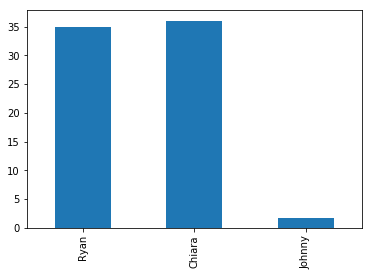

In [84]:
ages.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [90]:
np.log(ages) / ages**2

Ryan      0.002902
Chiara    0.002765
Johnny    0.181416
dtype: float64

We can access the underlying index object if we need to:

In [93]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [95]:
ages.loc['Johnny']

1.8

Or by raw position using `.iloc`

In [96]:
ages.iloc[2]

1.8

If we need to, we can always get the raw data back out as well

In [97]:
ages.values

array([ 35. ,  36. ,   1.8])

In [98]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [122]:
# first we create a dictionary
data = {'age': [35, 36, 1.8],
        'height': [180, 155, 83],
        'weight': [72.5, np.nan, 11.3]}
df = pd.DataFrame(data, index=['Ryan', 'Chiara', 'Johnny'])
df

,age,height,weight
Ryan,35.0,180,72.5
Chiara,36.0,155,NaN
Johnny,1.8,83,11.3


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Ryan to Johnny
Data columns (total 3 columns):
age       3 non-null float64
height    3 non-null int64
weight    2 non-null float64
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [113]:
df.min()

age        1.8
height    83.0
weight    11.3
dtype: float64

In [114]:
df.mean()

age        24.266667
height    139.333333
weight     41.900000
dtype: float64

In [115]:
df.std()

age       19.463128
height    50.362023
weight    43.274935
dtype: float64

In [102]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.000000
mean,24.266667,139.333333,41.900000
std,19.463128,50.362023,43.274935
min,1.800000,83.000000,11.300000
25%,18.400000,119.000000,26.600000
50%,35.000000,155.000000,41.900000
75%,35.500000,167.500000,57.200000
max,36.000000,180.000000,72.500000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [112]:
df['height']

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

...or using attribute syntax.

In [116]:
df.height

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

New columns can easily be added to DataFrames

In [123]:
df['density'] = df.weight / df.height
df

,age,height,weight,density
Ryan,35.0,180,72.5,0.402778
Chiara,36.0,155,NaN,NaN
Johnny,1.8,83,11.3,0.136145


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [125]:
education = pd.Series(['PhD', 'PhD', None, 'masters'],
                     index=['Ryan', 'Chiara', 'Johnny', 'Takaya'],
                     name='education')
# returns a new DataFrame
df.join(education)

,age,height,weight,density,education
Ryan,35.0,180,72.5,0.402778,PhD
Chiara,36.0,155,NaN,NaN,PhD
Johnny,1.8,83,11.3,0.136145,None


In [127]:
# returns a new DataFrame
df.join(education, how='right')

,age,height,weight,density,education
Ryan,35.0,180.0,72.5,0.402778,PhD
Chiara,36.0,155.0,NaN,NaN,PhD
Johnny,1.8,83.0,11.3,0.136145,None
Takaya,NaN,NaN,NaN,NaN,masters


In [128]:
# returns a new DataFrame
df.reindex(['Ryan', 'Chiara', 'Johnny', 'Takaya', 'Kerry'])

,age,height,weight,density
Ryan,35.0,180.0,72.5,0.402778
Chiara,36.0,155.0,NaN,NaN
Johnny,1.8,83.0,11.3,0.136145
Takaya,NaN,NaN,NaN,NaN
Kerry,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful

In [131]:
adults = df[df.age > 18]
adults

,age,height,weight,density
Ryan,35.0,180,72.5,0.402778
Chiara,36.0,155,NaN,NaN


In [133]:
df['is_adult'] = df.age > 18
df

,age,height,weight,density,is_adult
Ryan,35.0,180,72.5,0.402778,True
Chiara,36.0,155,NaN,NaN,True
Johnny,1.8,83,11.3,0.136145,False


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

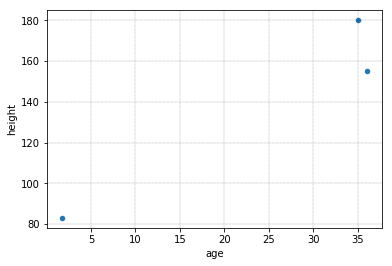

In [108]:
df.plot(kind='scatter', x='age', y='height', grid=True)

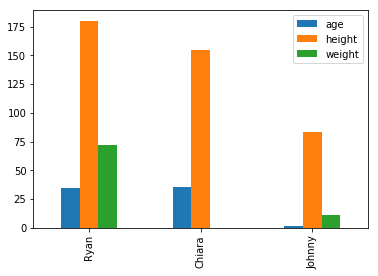

In [110]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

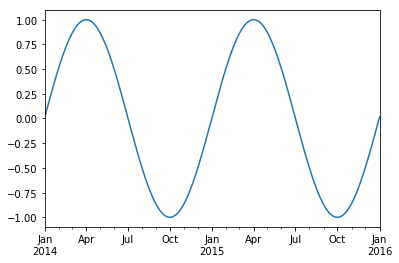

In [134]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

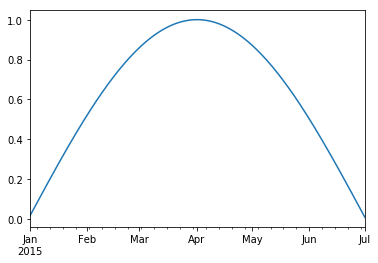

In [137]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

## Stock Market Data

Now we read some stock market data from Google finance. I have created direct links to Google and Apple stock price data.

In [169]:
!curl -L -o goog.csv http://tinyurl.com/rces-goog
!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  132k    0  132k    0     0   185k      0 --:--:-- --:--:-- --:--:--  185k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  166k    0  166k    0     0   110k      0 --:--:--  0:00:01 --:--:-- 1795k


In [15]:
! head goog.csv

﻿Date,Open,High,Low,Close,Volume
11-Oct-17,973.72,990.71,972.25,989.25,1693274
10-Oct-17,980.00,981.57,966.08,972.60,968362
9-Oct-17,980.00,985.42,976.11,977.00,891355
6-Oct-17,966.70,979.46,963.36,978.89,1173882
5-Oct-17,955.49,970.91,955.18,969.96,1213816
4-Oct-17,957.00,960.39,950.69,951.68,952391
3-Oct-17,954.00,958.00,949.14,957.79,888346
2-Oct-17,959.98,962.54,947.84,953.27,1283444
29-Sep-17,952.00,959.79,951.51,959.11,1580994


We can see that this is well-formated, tidy CSV data, ready for immediate ingestion into Pandas.
We use Pandas' amazing [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function to do this.

In [170]:
goog = pd.read_csv('goog.csv')
goog.head()

,Date,Open,High,Low,Close,Volume
0,11-Oct-17,973.72,990.71,972.25,989.25,1693274
1,10-Oct-17,980.00,981.57,966.08,972.60,968362
2,9-Oct-17,980.00,985.42,976.11,977.00,891355
3,6-Oct-17,966.70,979.46,963.36,978.89,1173882
4,5-Oct-17,955.49,970.91,955.18,969.96,1213816


Not bad! But we can do better by giving read_csv some hints.

In [172]:
goog = pd.read_csv('goog.csv', parse_dates=[0], index_col=0)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-11,973.72,990.71,972.25,989.25,1693274
2017-10-10,980.00,981.57,966.08,972.60,968362
2017-10-09,980.00,985.42,976.11,977.00,891355
2017-10-06,966.70,979.46,963.36,978.89,1173882
2017-10-05,955.49,970.91,955.18,969.96,1213816


In [173]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3310 entries, 2017-10-11 to 2004-08-19
Data columns (total 5 columns):
Open      3310 non-null float64
High      3310 non-null float64
Low       3310 non-null float64
Close     3310 non-null float64
Volume    3310 non-null object
dtypes: float64(4), object(1)
memory usage: 155.2+ KB


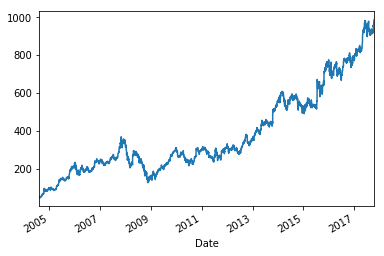

In [174]:
goog.Close.plot()

In [180]:
aapl = pd.read_csv('aapl.csv', parse_dates=[0], index_col=0)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2017-10-11 to 2001-11-20
Data columns (total 5 columns):
Open      4000 non-null float64
High      4000 non-null float64
Low       4000 non-null float64
Close     4000 non-null float64
Volume    4000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 187.5 KB


In [176]:
aapl_close = aapl.Close.rename('aapl')
goog_close = goog.Close.rename('goog')
stocks = pd.concat([aapl_close, goog_close], axis=1)
stocks.head()

,aapl,goog
Date,,
2001-11-20,1.40,NaN
2001-11-21,1.41,NaN
2001-11-23,1.42,NaN
2001-11-26,1.53,NaN
2001-11-27,1.50,NaN


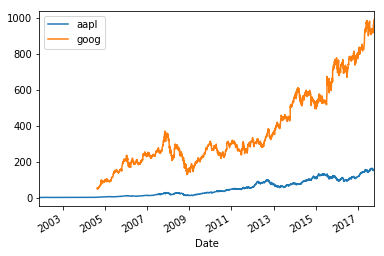

In [177]:
stocks.plot()

Pandas knows how to take correlations. And [tons of other computations](https://pandas.pydata.org/pandas-docs/stable/computation.html).

In [181]:
stocks.corr()

,aapl,goog
aapl,1.000000,0.917181
goog,0.917181,1.000000


Because it understands times, it can do really cool stuff like resampling.

/Users/rpa/anaconda/envs/phys_ocean/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


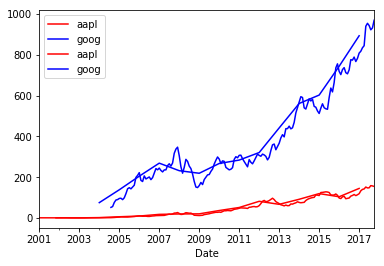

In [190]:
# resample by taking the mean over each month

fig, ax = plt.subplots()
stocks.resample('MS').mean().plot(ax=ax, colors=['r', 'b'])
# and each year
stocks.resample('AS').mean().plot(ax=ax, colors=['r', 'b'])

The string `QS` means "month start. The string `AS` mean "year start". There is a long list of possible [frequency aliases](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases).

We can also apply other reduction operations with resample. These are described in the [resample docs](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling).

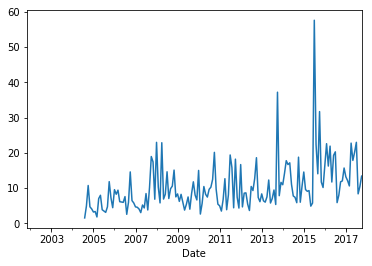

In [196]:
# get resample object
rs = stocks.goog.resample('MS')
# standard deviation of each month
rs.std().plot()

## Temperature Data

We download some timeseries data from the [Berkeley Earth(http://berkeleyearth.org/) surface temperature dataset. This is timeseries data from various locations around earth. Let's get our local temperatures.

In [207]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313k  100  313k    0     0   150k      0  0:00:02  0:00:02 --:--:--  150k


If we examine this data, we see it is NOT a well formated CSV file. Loading it will be a bit painful, but Pandas makes the job retatively easy.

In [238]:
! head -72 nyc_temp.txt | tail -8

% 
%                  Monthly          Annual          Five-year        Ten-year        Twenty-year
% Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
  1743    11    -2.276  1.665       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743    12       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     1       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     2       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN


In [4]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] + 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

,year,month,monthly_anom
0,1743,11,-2.276
1,1743,12,NaN
2,1744,1,NaN
3,1744,2,NaN
4,1744,3,NaN


In [5]:
# need a day
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

,monthly_anom
1743-11-01,-2.276
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


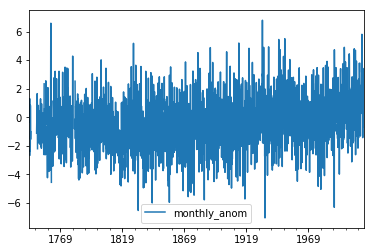

In [6]:
temp.plot()

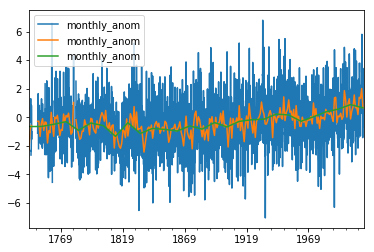

In [7]:
fig, ax = plt.subplots()
temp.plot(ax=ax)
temp.resample('AS').mean().plot(ax=ax)
temp.resample('10AS').mean().plot(ax=ax)

Pandas can do both time-based resampling and operation over fixed-length rolling windows. These are very similar but distinct; see [discussion in Pandas docs](https://pandas.pydata.org/pandas-docs/stable/computation.html#time-aware-rolling-vs-resampling).

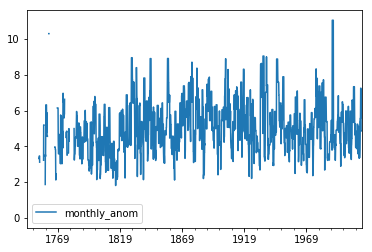

In [14]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot()

To create a "climatology" (i.e. the average of all same months), we can use Pandas' [groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html) functionality.

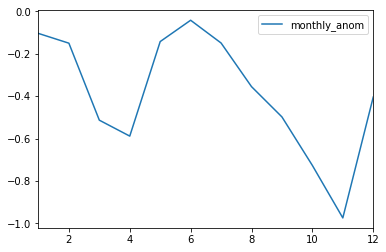

In [18]:
# diurnal cycle has been removed!
temp.groupby(temp.index.month).mean().plot()

In [26]:
# find the hottest years
temp.groupby(temp.index.year).mean().sort_values('monthly_anom', ascending=False).head(10)

,monthly_anom
2012,2.009833
1998,1.862250
2006,1.557583
1949,1.424500
2010,1.395917
1991,1.395583
1990,1.360833
2011,1.310583
2002,1.290500
1953,1.212833


## Groupby

Now we will explore groupby's capabilities more in a public dataset from the City of New York: the [Rat Information Portal](The Rat Information Portal)!

In [28]:
# https://data.cityofnewyork.us/Health/Rats/amyk-xiv9
rats = pd.read_csv('https://data.cityofnewyork.us/api/views/amyk-xiv9/rows.csv',
                  parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [29]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151315 entries, 0 to 151314
Data columns (total 20 columns):
INSPECTION_TYPE                151315 non-null object
JOB_TICKET_OR_WORK_ORDER_ID    151315 non-null int64
JOB_ID                         151315 non-null object
JOB_PROGRESS                   151315 non-null int64
BBL                            151315 non-null int64
BORO_CODE                      151315 non-null int64
BLOCK                          151315 non-null int64
LOT                            151315 non-null int64
HOUSE_NUMBER                   149259 non-null object
STREET_NAME                    151275 non-null object
ZIP_CODE                       151309 non-null float64
X_COORD                        150341 non-null float64
Y_COORD                        150341 non-null float64
LATITUDE                       150930 non-null float64
LONGITUDE                      150930 non-null float64
BOROUGH                        151315 non-null object
INSPECTION_DATE           

In [33]:
rats.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,COMPLIANCE,20090,PO14874,2,3001480046,3,148,46,81,WILLOUGHBY STREET,11201.0,988201.0,191458.0,40.692184,-73.985753,Brooklyn,2010-05-14 13:46:39,Active Rat Signs,2010-05-18 13:00:01,"(40.6921838341671, -73.9857525784075)"
1,COMPLIANCE,24538,PO17193,2,4123940091,4,12394,91,172-04,LINDEN BOULEVARD,11434.0,1045829.0,191395.0,40.691804,-73.777942,Queens,2010-03-03 09:21:09,Active Rat Signs,2010-03-05 11:30:16,"(40.6918037759981, -73.7779418602477)"
2,COMPLIANCE,25025,PO15009,2,2029470041,2,2947,41,1881,BELMONT AVENUE,10457.0,1013847.0,247021.0,40.844647,-73.893030,Bronx,2010-01-06 10:45:24,Active Rat Signs,2010-01-14 11:45:09,"(40.8446468740184, -73.89302971662)"
3,COMPLIANCE,25027,PO15005,2,2032340065,2,3234,65,212,WEST FORDHAM ROAD,10468.0,1009198.0,253356.0,40.862049,-73.909810,Bronx,2010-01-06 15:15:55,Active Rat Signs,2010-01-14 11:44:46,"(40.8620488653607, -73.9098097882175)"
4,COMPLIANCE,25032,PO15007,2,2043520001,2,4352,1,789,ASTOR AVENUE,10467.0,1021812.0,252577.0,40.859866,-73.864209,Bronx,2010-01-22 15:10:03,Active Rat Signs,2010-01-26 15:16:54,"(40.8598660947898, -73.8642093926991)"


Let's do some grouping to explore the data.

In [31]:
rats.groupby('INSPECTION_TYPE')['INSPECTION_TYPE'].count()

INSPECTION_TYPE
COMPLIANCE     51277
INITIAL       100038
Name: INSPECTION_TYPE, dtype: int64

In [32]:
rats.groupby('BORO_CODE')['BORO_CODE'].count().head()

BORO_CODE
1    46206
2    56984
3    37112
4     9058
5     1955
Name: BORO_CODE, dtype: int64

In [34]:
rats.groupby('STREET_NAME')['STREET_NAME'].count().head(20)

STREET_NAME
                                     1
   1 AVENUE                         24
   2 AVENUE                         28
   3 AVENUE                         19
   3 STREET                          3
   4 AVENUE                         10
   5 AVENUE                         46
   5 STREET                          3
   6 AVENUE                          9
   6 STREET                          3
   7 AVENUE                         30
   7 AVENUE SOUTH                    1
   8 AVENUE                         13
   9 AVENUE                          8
   9 STREET                          9
  10 AVENUE                          2
  11 AVENUE                          1
  11 STREET                          2
  12 AVENUE                          2
  12 STREET                          4
Name: STREET_NAME, dtype: int64

This dataset clearly needs some cleaning. We can Pandas' [text features](https://pandas.pydata.org/pandas-docs/stable/text.html) to strip the whitespace out of the data.

In [39]:
# clean up street name
street_names_cleaned = rats.STREET_NAME.str.strip()
street_names_cleaned.groupby(street_names_cleaned).count().head(20)

STREET_NAME
                          1
********************     53
0000                      1
1 AVENUE                570
1 PLACE                   2
1 STREET                 22
1/2 2 AVENUE              1
1/2 5 AVENUE              2
1/2 7 AVENUE SOUTH        4
1/2 BEDFORD STREET        1
1/2 BRIGGS AVENUE         1
1/2 DOWNING STREET        1
1/2 EAST 115 STREET       4
1/2 EAST 7 STREET         3
1/2 EAST 9 STREET         1
1/2 KING STREET           1
1/2 ROGERS AVENUE         3
10 AVENUE               226
10 STREET                40
100 STREET                3
Name: STREET_NAME, dtype: int64

In [40]:
count = street_names_cleaned.groupby(street_names_cleaned).count()
count.sort_values(ascending=False).head(20)

STREET_NAME
GRAND CONCOURSE       2299
BROADWAY              2226
AMSTERDAM AVENUE      1213
3 AVENUE              1188
WEBSTER AVENUE        1138
MORRIS AVENUE         1077
JEROME AVENUE         1030
EASTERN PARKWAY        981
WALTON AVENUE          975
ST NICHOLAS AVENUE     964
PARK AVENUE            961
LAFAYETTE AVENUE       893
VALENTINE AVENUE       826
2 AVENUE               807
LEXINGTON AVENUE       805
BEDFORD AVENUE         791
WASHINGTON AVENUE      768
GRAND AVENUE           748
GREENE AVENUE          745
CRESTON AVENUE         745
Name: STREET_NAME, dtype: int64

To get a better idea of the geography, let's plot the locations of the inspections. But first let's look at the statistics.

In [42]:
rats[['LATITUDE', 'LONGITUDE']].describe()

,LATITUDE,LONGITUDE
count,150930.000000,150930.000000
mean,40.739645,-73.890969
std,1.609669,1.991634
min,-85.443283,-155.778285
25%,40.704909,-73.956307
50%,40.798729,-73.927440
75%,40.844159,-73.901627
max,40.912863,56.311386


There are clearly some weird outliers in the location data. We need to strip these out before plotting.

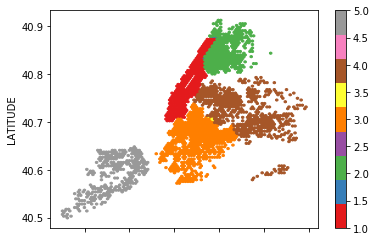

In [24]:
valid_latlon = rats[(rats.LATITUDE > 30) & (rats.LONGITUDE < -70)]
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', C='BORO_CODE', cmap='Set1')

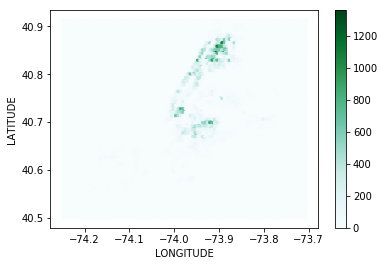

In [34]:
# https://github.com/pandas-dev/pandas/issues/10678
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False)

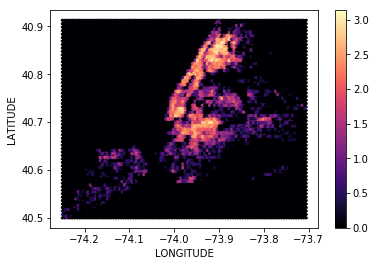

In [36]:
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

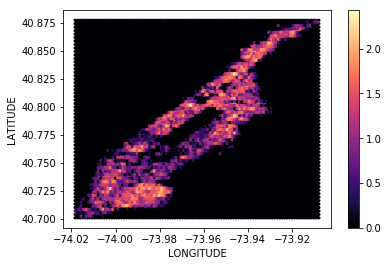

In [70]:
manhattan_rats = valid_latlon[valid_latlon.BORO_CODE==1]
manhattan_rats.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

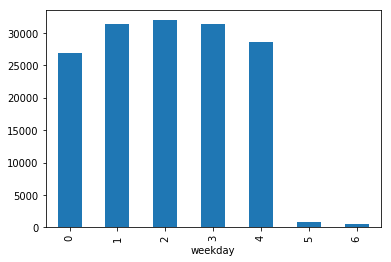

In [52]:
inspection_date = pd.DatetimeIndex(rats.INSPECTION_DATE)

fig, ax = plt.subplots()
rats.groupby(inspection_date.weekday)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('weekday');

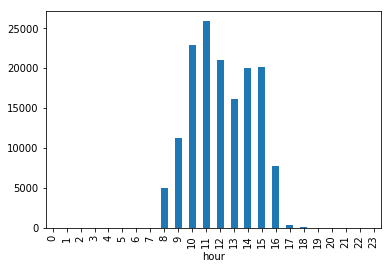

In [51]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.hour)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('hour');

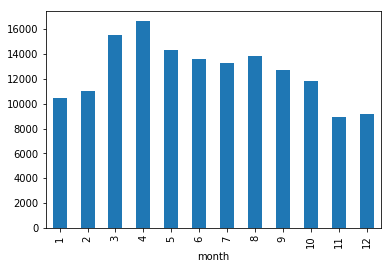

In [53]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.month)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('month')